# The Central Limit Theorem and Continuous Probability Distributions

Run the code in each of the cells below. Since this is a demonstration, you do not need to add any code. 

You have an understanding of discrete probability distributions and how they apply to self-driving cars. Now you will gain intuition about one of the most important continuous probability distributions. 

There is a specific continuous probability distribution that comes up time and time again when working with self-driving cars: the normal distribution (aka Gaussian Distribution). 

The normal distribution has a special characteristic in that the mean, median and mode are all the same. Run the code in the next cell to see what a normal distribution looks like.

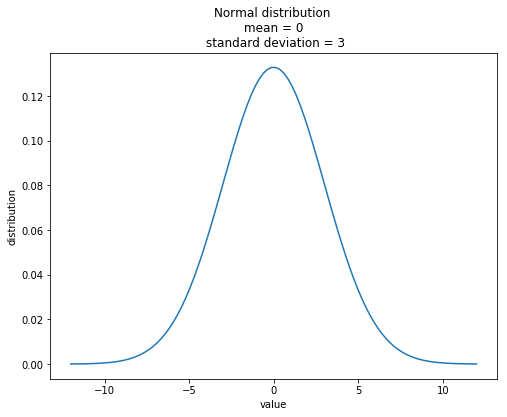

In [1]:
# import libraries used in the notebook
%matplotlib inline

import numpy as np
from scipy import stats
from matplotlib import mlab
import matplotlib.pyplot as plt

# Set figure height and width
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

x = np.linspace(-12, 12, 100)
plt.title('Normal distribution \n mean = 0 \n standard deviation = ' + str(3))
plt.xlabel('value')
plt.ylabel('distribution')
plt.plot(x,mlab.normpdf(x, 0, 3))    


Like in a discrete probability distribution, the area under the curve represents probability. The difference between a discrete distribution and a continuous distribution is the lack of sudden jumps in the continuous distribution.

In self-driving cars, the normal distribution is especially important when detecting other vehicles, pedestrians, animals, bicycles, etc. 

Say there is a bicycle moving around your self-driving car. 

A radar measurement might tell you there is a bicycle 10 feet in front of the car, but there is some uncertainty in that measuermenet. The uncertainty is generally modeled with a normal distribution. 

In between radar measurements, the self-driving car still needs to be aware of the bicycle's location. So the car will extrapolate where it thinks the bicycle is moving. The uncertainty in the bicycle's location will also be modeled with a normal distribution.

![title](bicycle.jpg)

The bicycle is most likely in the center of the distribution, but there is still some probability that the bicycle is higher or lower according to the normal distribution.

# Normal Distribution Intuition

Compared to some other continuous probability distributions, the normal distribution is relatively easy to work with. And the distribution works well when modelling uncertainty in sensor measurements and object detection.

In the Kalman Filter lessons, you will learn more about the characteristics of the distribution and see how to work with it. For now, you'll use this demo to gain intuition about the normal distribution. 




# Probability Distributions

Before you start the demo, let's look at a few examples of probability distributions. Run the code below to visualize a few common continuous probability distributions.

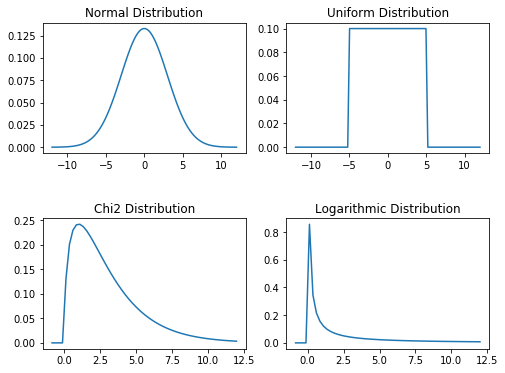

In [3]:
x = np.linspace(-12, 12, 100)

plt.subplot(221)
plt.plot(x,mlab.normpdf(x, 0, 3)) 
plt.title('Normal Distribution')

plt.subplot(222)
plt.plot(x,stats.uniform.pdf(x,-5,10))
plt.title('Uniform Distribution')

plt.subplot(223)
plt.plot(x[x > -1],stats.chi2.pdf(x[x>-1],3))
plt.title('Chi2 Distribution')

plt.subplot(224)
plt.plot(x[x > -1],stats.lognorm.pdf(x[x > -1],3))
plt.title('Logarithmic Distribution')

plt.subplots_adjust(hspace=.5)


# Central Limit Theorem

To gain intuition about the normal distribution, you are going to learn about the central limit theorem. 

The basic principle is that you can start out with any type probability distribution and transform it into a normal distribution. But of course it's a little bit more complicated than that.

You need to take samples from the probability distribution and then calculate the mean of each sample. You do this over and over again taking the mean of a random sample. The probability distribution of these means will be normal. 

First, you are going to go through an example to see how the central limit theorem works. Then you'll be provided with a function where you can play around with different probbability distributions to convince yourself that the central limit theorem works.

# An unknown probability distribution

Here is a function that creates a probability distribution that you probably would not find in nature. Run the cell below to create thedistribution and see a histogram of the population that you will draw random samples from.

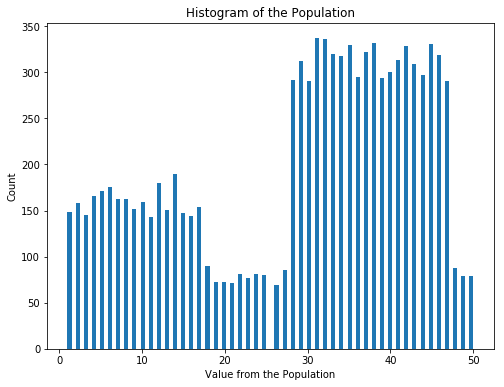

In [4]:
def probabilities(sample_distribution, trials, num_bins):
    
    # array from 1 to sample_distribution
    pers = np.arange(1,sample_distribution + 1,1)
    
    # calculate array of relative probabilities for each sample
    lower = int(.35*len(pers))
    middle = int(.2*len(pers))
    upper = int(.40*len(pers))
    extreme = len(pers) - (lower + middle + upper)
    
    prob = [1.0]*(lower) + [.5]*middle + [2.0]*upper + [.5]*extreme
    
    # normalize probability distribution
    prob /= np.sum(prob)

    # take a random sample for number of times in trials variable
    probability_distribution = np.random.choice(pers, trials, p=prob)

    # visualize distribution
    plt.hist(probability_distribution, bins = num_bins)
    plt.title('Histogram of the Population')
    plt.xlabel('Value from the Population')
    plt.ylabel('Count')
    plt.show()
    
    # return random sample size of trials variable
    return probability_distribution

### create a distribution from the probabilities() function
probability_distribution = probabilities(50,10000,100)

The population of values definitely does not have a normal distribution. Run the next cell to calculate the mean of this population:


In [5]:
print('population mean', np.mean(probability_distribution))

population mean 28.8821


##### Code for the Central Limit Theorem

The code in the next cell is going to randomly take 10 samples from the distribution:

```
for sample in range(10):
    samples.append(distribution[np.random.randint(1,len(distribution))])
```

and then calculate the mean of the samples.

```
sample_means.append(np.mean(samples))
```

Notice that the code is storing the mean of each set into the `sample_means` list.

Then the code will repeat this process one-hundred thousand times storing every calculated mean into the `sample_means` list.

Finally, the code will output a histogram of the original population alongside a histogram of the sample means. 

Run the code cell below to see the central limit theorem in action:

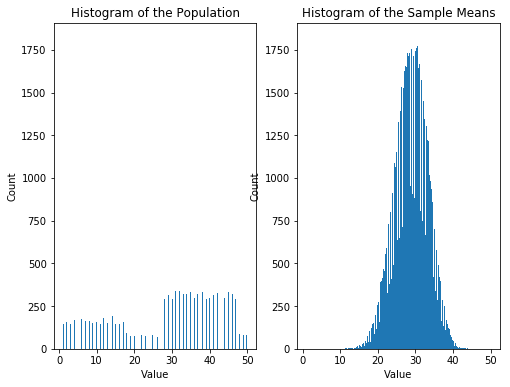

In [6]:
# take samples from the distribution and calculate the mean of each sample
iterations = 100000
num_samples = 10
distribution = probability_distribution
sample_means = []

# iterate through picking samples and calculating the mean of each sample
for iteration in range(iterations):

    samples = []

    # iterate through for the sample size chosen and randomly pick samples
    for sample in range(num_samples):
        samples.append(distribution[np.random.randint(1,len(distribution))])

    # calculate the mean of the sample
    sample_means.append(np.mean(samples))

# Plot the distribution of the sample means alongside the population histogram
ax1 = plt.subplot(121)
plt.hist(distribution, bins=200)
plt.title('Histogram of the Population')
plt.xlabel('Value')
plt.ylabel('Count')

ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
plt.hist(sample_means, bins=200)
plt.title('Histogram of the Sample Means')
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()

Pretty amazing! Think about what this means. You started out with a population that did not look normal at all. You then took random samples with a size of 10, and then calculated the mean of the samples. You did this over and over again, and the distribution of the sample means looks normal. 

##### Increasing Sample Size
Let's see what happens if the sample size goes up to 50. Run the code below:

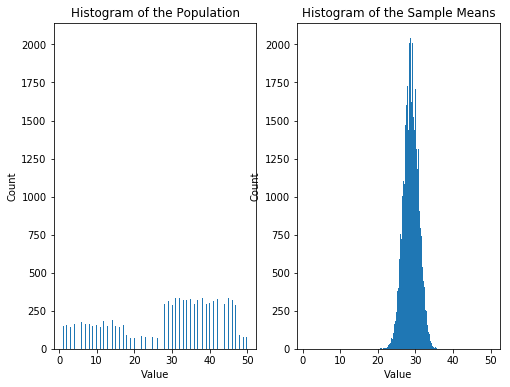

In [7]:
# take samples from the distribution and calculate the mean of each sample
iterations = 100000
num_samples = 50
distribution = probability_distribution
sample_means = []

# iterate through picking samples and calculating the mean of each sample
for iteration in range(iterations):

    samples = []

    # iterate through for the sample size chosen and randomly pick samples
    for sample in range(num_samples):
        samples.append(distribution[np.random.randint(1,len(distribution))])

    # calculate the mean of the sample
    sample_means.append(np.mean(samples))

# Plot the distribution of the sample means alongside the population histogram
ax3 = plt.subplot(121)
plt.hist(distribution, bins=200)
plt.title('Histogram of the Population')
plt.xlabel('Value')
plt.ylabel('Count')

ax4 = plt.subplot(122, sharex=ax3, sharey=ax3)
plt.hist(sample_means, bins=200)
plt.title('Histogram of the Sample Means')
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()

It looks like the normal distribution got 'peakier' and the range of values on the x-axis got smaller. 

That's very interesting! As your sample size increases, it seems to be more likely that your sample mean will be close to the population mean, which was about 29. This makes sense intuitively. The population had 10,000 values in it. If your sample has 9,999 randomly chosen values, you'll get close to the actual mean. If you take 1 sample, it's very likely that your value is far from the mean.

That is one reason why you might see recommendations to use at least 20, 30 or 50 samples when taking measurements and running experiments. The larger your sample size, the more likely it becomes that your sample mean is equal to the population mean.

##### Sample Means and the Normal Distribution

To convince you that the new distribution is close to a normal distribution, you are going to output two more visualizations. 

The first visualization will adjust the distribution so that the area of all the bars adds up to 1. The chart will also show a normal distribution that has the same mean and standard deviation of the sample means.

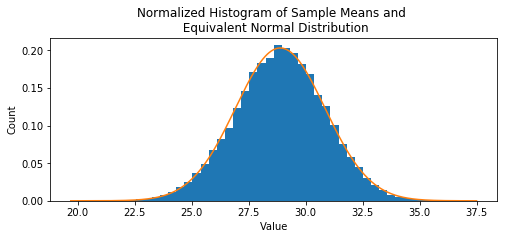

In [8]:
# normalized histogram of the sample means and an equivalent normal distribution with same mean and standard deviation 
fig = plt.figure(figsize=(8, 3)) 

plt.hist(sample_means, bins=50, normed=True)
plt.title('Normalized Histogram of Sample Means and \n Equivalent Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Count')

x = np.linspace(min(sample_means), max(sample_means), 1000)
plt.plot(x,mlab.normpdf(x, np.mean(sample_means),np.std(sample_means)))    

plt.show()


The distribution of the sample means looks pretty similar to the continuous normal distribution. 

Here is one more visualition to help convince you that the sample means distribution is getting close to normal. The following are [probability plots](http://www.itl.nist.gov/div898/handbook/eda/section3/normprpl.htm). The x-axis has the values from your distribution and the y-axis has ideal values if the distribution were normal. A completely normal distribution would therefore be a straight line. 

Run the code cell below to compare the probability plot of the population with the porbability plot of the sample means. 

Text(0.5,1,'Probability Plot of the Sample Means')

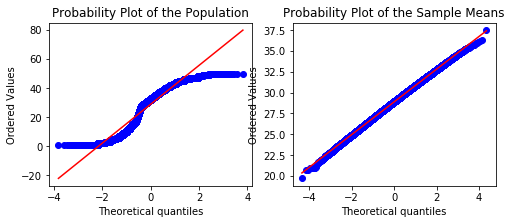

In [9]:
### Compare population distribution with sample mean distribution

fig = plt.figure(figsize=(8, 3)) 

ax5 = plt.subplot(121)
stats.probplot(probability_distribution, plot=plt)
ax6 = plt.subplot(122)
stats.probplot(sample_means, plot=plt)

ax5.set_title('Probability Plot of the Population')
ax6.set_title('Probability Plot of the Sample Means')


So it looks like the distribution of the sample means (sample size was 30), is much closer to a normal distribution than the original population.

# Explore on Your Own

Now you can convince yourself that different probability distributions still work with the central limit theorem.  Here are a set of functions to create different types of probability distributions. 

Make sure to run the cells below before trying to use these functions.

In [10]:
### Probability distributions

def random_uniform(low_value, high_value, num_samples):    
    return np.random.uniform(low_value, high_value, num_samples)

### Poisson Distribution
def poisson_distribution(expectation, num_samples):
    return np.random.poisson(expectation, num_samples)

def binomial_distribution(result, probability, trials):
    return np.random.binomial(result, probability, trials)


And here is some example code of how to create distributions from the functions given. These distributions will be your populations.

In [11]:
uniform = random_uniform(1, 5, 100000)
poisson = poisson_distribution(6.0, 10000)
binomial = binomial_distribution(1, 0.5, 10000)

We've provided a function that does all of the central limit theorem analysis for you. The function below receives a probability distribution and then takes random samples over and over again. The mean of each sample is calculated, and then the resulting statistics and histograms are displayed. Run the code cell below to initialize the function:

In [12]:
### Shows Central Limit Theorem: takes samples from a distribution and calculates the mean of each sample. 
#
# variables:
# distribution => array containing values from a population
# iterations => number of times to draw samples and calculate the mean of the sample
# num_samples => sample size
# num_bins => controls number of bins in the histograms3
#
# outputs:
# (1) summary statistics of the population and the means of the samples
# (2) histogram of the population and means of the samples
# (3) normalized histogram of the means and line chart of equivalent normal distribution with same mean and stdeviation
# (4) probability plot of the original distribution and the means of the samples
#
###

def sample_means_calculator(distribution, iterations, num_samples, num_bins):
    
    # take samples from the distribution and calculate the mean of each sample
    sample_means = []
    
    # iterate through picking samples and calculating the mean of each sample
    for iteration in range(iterations):
    
        samples = []
        
        # iterate through for the sample size chosen and randomly pick samples
        for sample in range(num_samples):
            samples.append(distribution[np.random.randint(1,len(distribution))])
    
        # calculate the mean of the sample
        sample_means.append(np.mean(samples))


    # Calculate summary statistics for the population and the sample means
    population_mean = np.average(distribution)
    population_median = np.median(distribution)
    population_deviation = np.std(distribution)
        
    sample_mean = np.mean(sample_means)
    sample_median = np.median(sample_means)
    sample_deviation = np.std(sample_means)

    print('population mean ', population_mean, ' \n population median ', population_median, '\n population standard deviation ', population_deviation)
    print('\n mean of sample means ', sample_mean, '\n median of sample means ', sample_median, '\n standard deviation of sample means ', sample_deviation)
    
    # histogram of the population and histogram of sample means
    fig = plt.figure(figsize=(8, 4)) 

    ax1 = plt.subplot(121)
    plt.hist(distribution, bins=num_bins)
    plt.title('Histogram of the Population')
    plt.xlabel('Value')
    plt.ylabel('Count')
    
    ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
    plt.hist(sample_means, bins=num_bins)
    plt.title('Histogram of the Sample Means')
    plt.xlabel('Value')
    plt.ylabel('Count')
        
    plt.show()
    
    # normalized histogram of the sample means and an equivalent normal distribution with same mean and standard deviation 
    fig = plt.figure(figsize=(8, 3)) 

    plt.hist(sample_means, bins=num_bins, normed=True)
    plt.title('Normalized Histogram of Sample Means and \n Equivalent Normal Distribution')
    plt.xlabel('Value')
    plt.ylabel('Count')

    x = np.linspace(min(sample_means), max(sample_means), 1000)
    plt.plot(x,mlab.normpdf(x, sample_mean, sample_deviation))    
    
    plt.show()
    
    # probability plots showing how the sample mean distribution is more normal than the population mean
    fig = plt.figure(figsize=(8, 3)) 
   
    ax5 = plt.subplot(121)
    stats.probplot(probability_distribution, plot=plt)
    ax6 = plt.subplot(122)
    stats.probplot(sample_means, plot=plt)
    
    ax5.set_title('Probability Plot of the Population')
    ax6.set_title('Probability Plot of the Sample Means')

    plt.show()

Now you can call the function like this:

`sample_means_calculator(distribution, iterations, num_samples, num_bins)`

Run the code cell below to see how the function works. The distribution variable is a population distribution. Iterations is how many times you want to sample the population. Num_samples is the sample size. And num_bins says how many bins to use for the histogram output.

It might take a minute or so to get the output depending on the size of your population, the sample size for showing the central limit theorem, etc. 

population mean  2.99434915034  
 population median  2.99298003672 
 population standard deviation  1.15486896913

 mean of sample means  2.99460940622 
 median of sample means  2.99489263039 
 standard deviation of sample means  0.16243869482


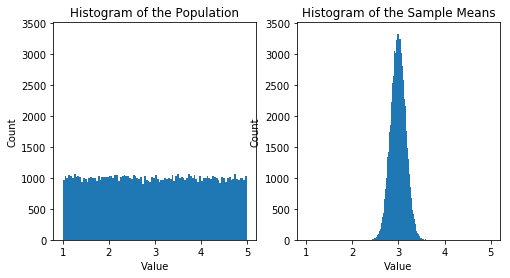

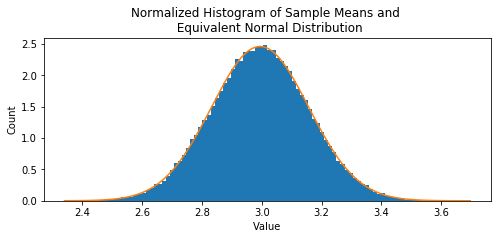

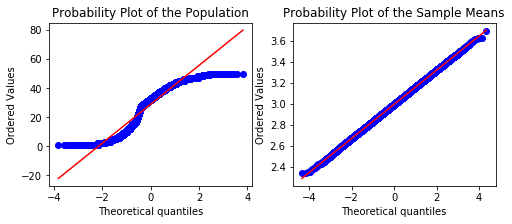

In [13]:
### Take samples and calculate the sample means for central limit theorem
sample_means_calculator(uniform, 100000, 50, 100)

# Your Turn

Now it's your turn to try different probability distributions and see the outcome. We have provided three functions that you can play around with for creating your population values. Feel free to create other types of distributions until you've convinced yourself that the central limit theorem works. Try adjusting the population distributions, the sample sizes, the number of iterations, etc. 

Here is some code to help you get started. Try changing the sample size, for example, to see how sample size affects results. What about the number of iterations, which controls the number of samples that will be taken from the population?

population mean  5.51023118766  
 population median  5.50277949668 
 population standard deviation  2.59538587526

 mean of sample means  5.51578179685 
 median of sample means  5.51580664667 
 standard deviation of sample means  0.368215071897


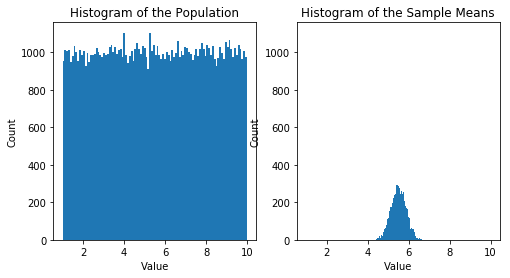

In [ ]:
### Sample Code
sample_means_calculator(random_uniform(1,10,100000), 10000, 50, 100)
# sample_means_calculator(poisson_distribution(6.0,500000), 10000, 90, 100)
# sample_means_calculator(binomial_distribution(1, 0.5, 10000), 10000, 200, 100)
#
# sample_means_calculator(distribution, number_of_iterations, sample_size, histogram_bins)
#
###
